We gebruiken `sounddevice` net zoals binnen project 1.3. Voor de documentatie en installatie handleiding zie [link](https://python-sounddevice.readthedocs.io/).

In [2]:
import sounddevice as sd
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import spectrogram

fs = 44100 # sample rate, zie microfoon specificaties

sd.query_devices() # geeft een lijst met devices en de bijbehorende nummers

> 0 MacBook Air Microphone, Core Audio (1 in, 0 out)
< 1 MacBook Air Speakers, Core Audio (0 in, 2 out)
  2 Microsoft Teams Audio, Core Audio (2 in, 2 out)
  3 Steam Streaming Microphone, Core Audio (2 in, 2 out)
  4 Steam Streaming Speakers, Core Audio (2 in, 2 out)
  5 ZoomAudioDevice, Core Audio (2 in, 2 out)

Bovenstaand zien we een lijst met beschikbare `devices`. Vanuit het project kunnen precieze details al bekend bij jou zijn. In bovenstaand uitdraaisel is je standaard audio ingangsdevice weergegeven met `>` en de standaard audio uitgangsdevice is weergegeven met `<`. Ook zie je `Code Audio (x in, y out)`, waarbij `x`(`y`) het aantal `channels` in(uit) zijn.

In [6]:
fs = 96000
duration = 10 # in seconden
arr = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float64', device=0) # neemt op in de achtergrond
sd.wait() # returns wanneer sd.rec() klaar is

## Onbewerkt spectrogram

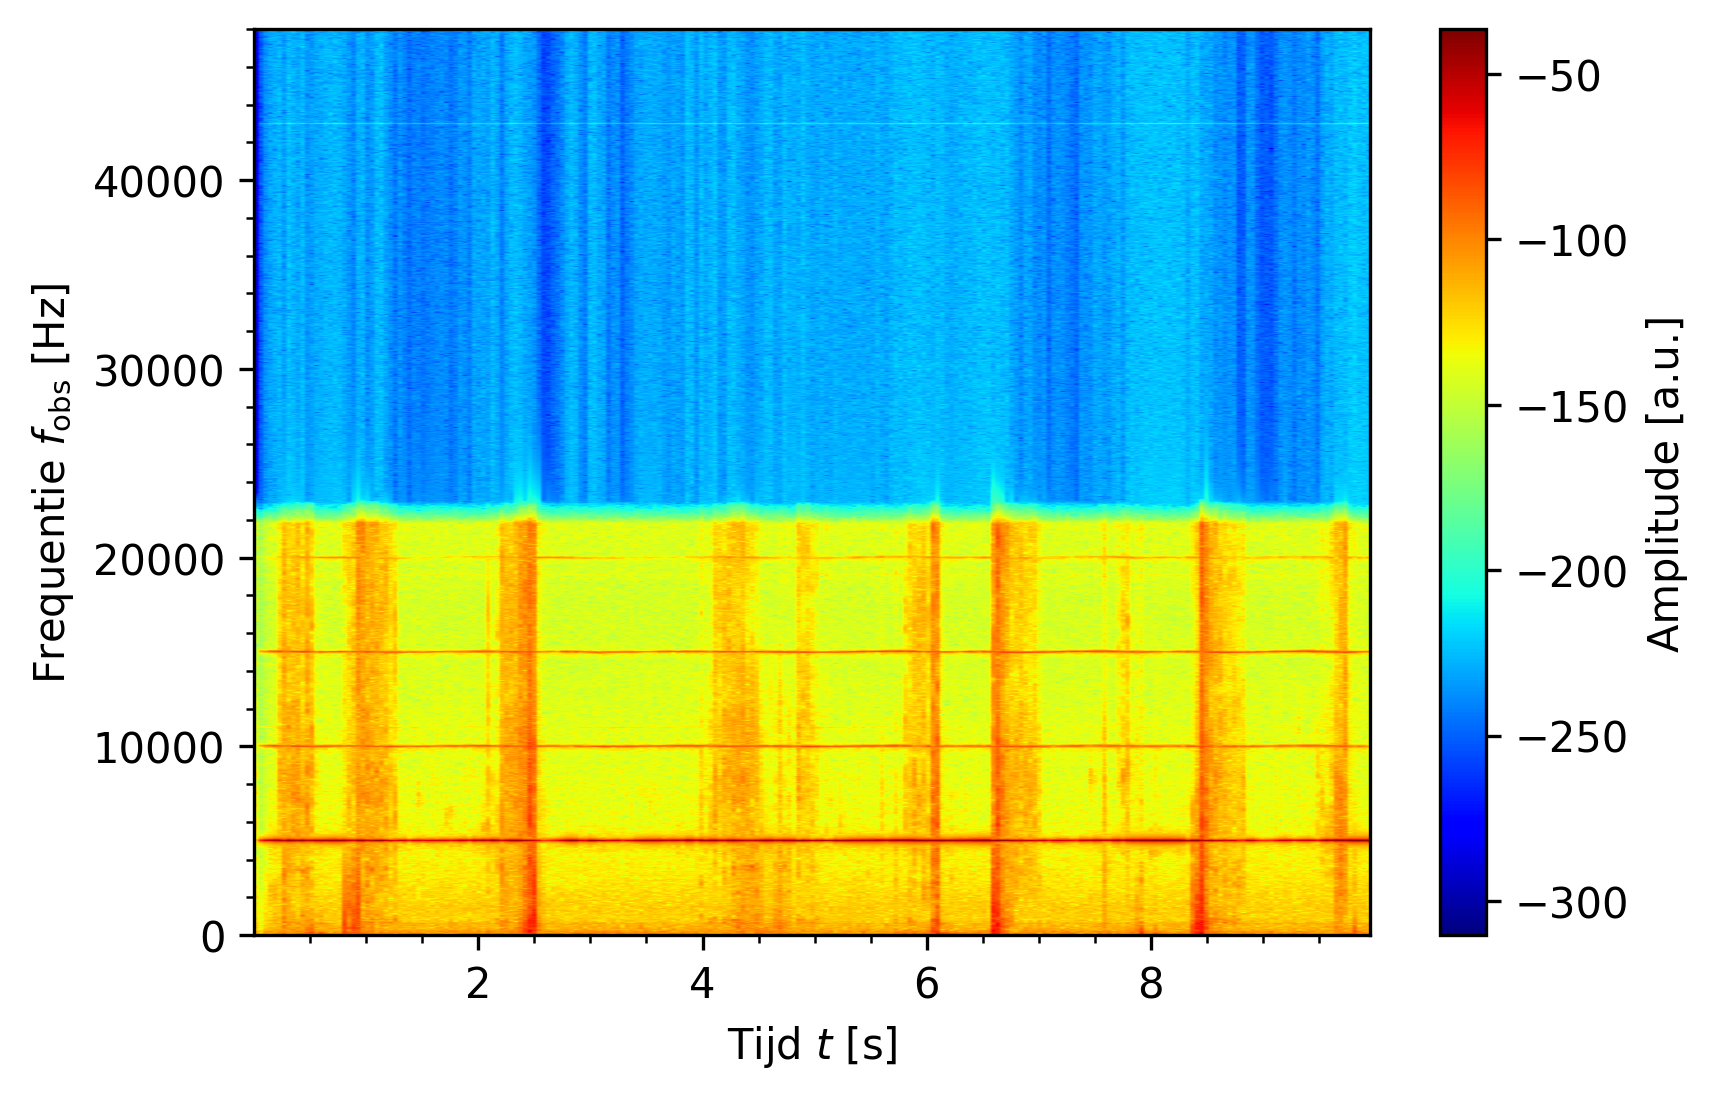

In [14]:
plt.figure(dpi=300)
_ = plt.specgram(arr[:,0], Fs=fs, NFFT=2**12, mode='psd', cmap='jet', vmin=None) #NFTT tussen 2**10 en 2**16
plt.colorbar(label="Amplitude [a.u.]")
plt.xlabel(r"Tijd $t$ [s]")
plt.ylabel(r"Frequentie $f_\mathrm{obs}$ [Hz]")
plt.minorticks_on()

We zien hier een meetresultaat waarbij $f_0 = 5$ kHz. Frequenties boven de 20 kHz zijn voor typische mensen niet hoorbaar. Wegens deze reden kunnen typische microfoons niet boven de 21 kHz meten, evenzo kunnen typische luidsprekers niet boven de 21 kHz uitzenden. 

In bovenstaand figuur zie je dan ook dat de amplitude van frequenties boven de 21 kHz nihil zijn. Verder zijn er in het donker rood overduidelijk boventonen van de grondtoon zichtbaar. Dit zijn harmonische welke ontstaan door (niet lineaire) verschijnselen in het elektronische meetsysteem, hier kunnen wij weinig aan doen. De brede verticale rood/oranje stroken zijn meet artifacten. Dit verbloemen we onder de term "ruis". 

## Op zoek naar het signaal!
De eerste voor de hand liggende stap is om niet hoorbare frequenties niet weer te geven. We stellen `plt.ylim()` in. 

(0.0, 21000.0)

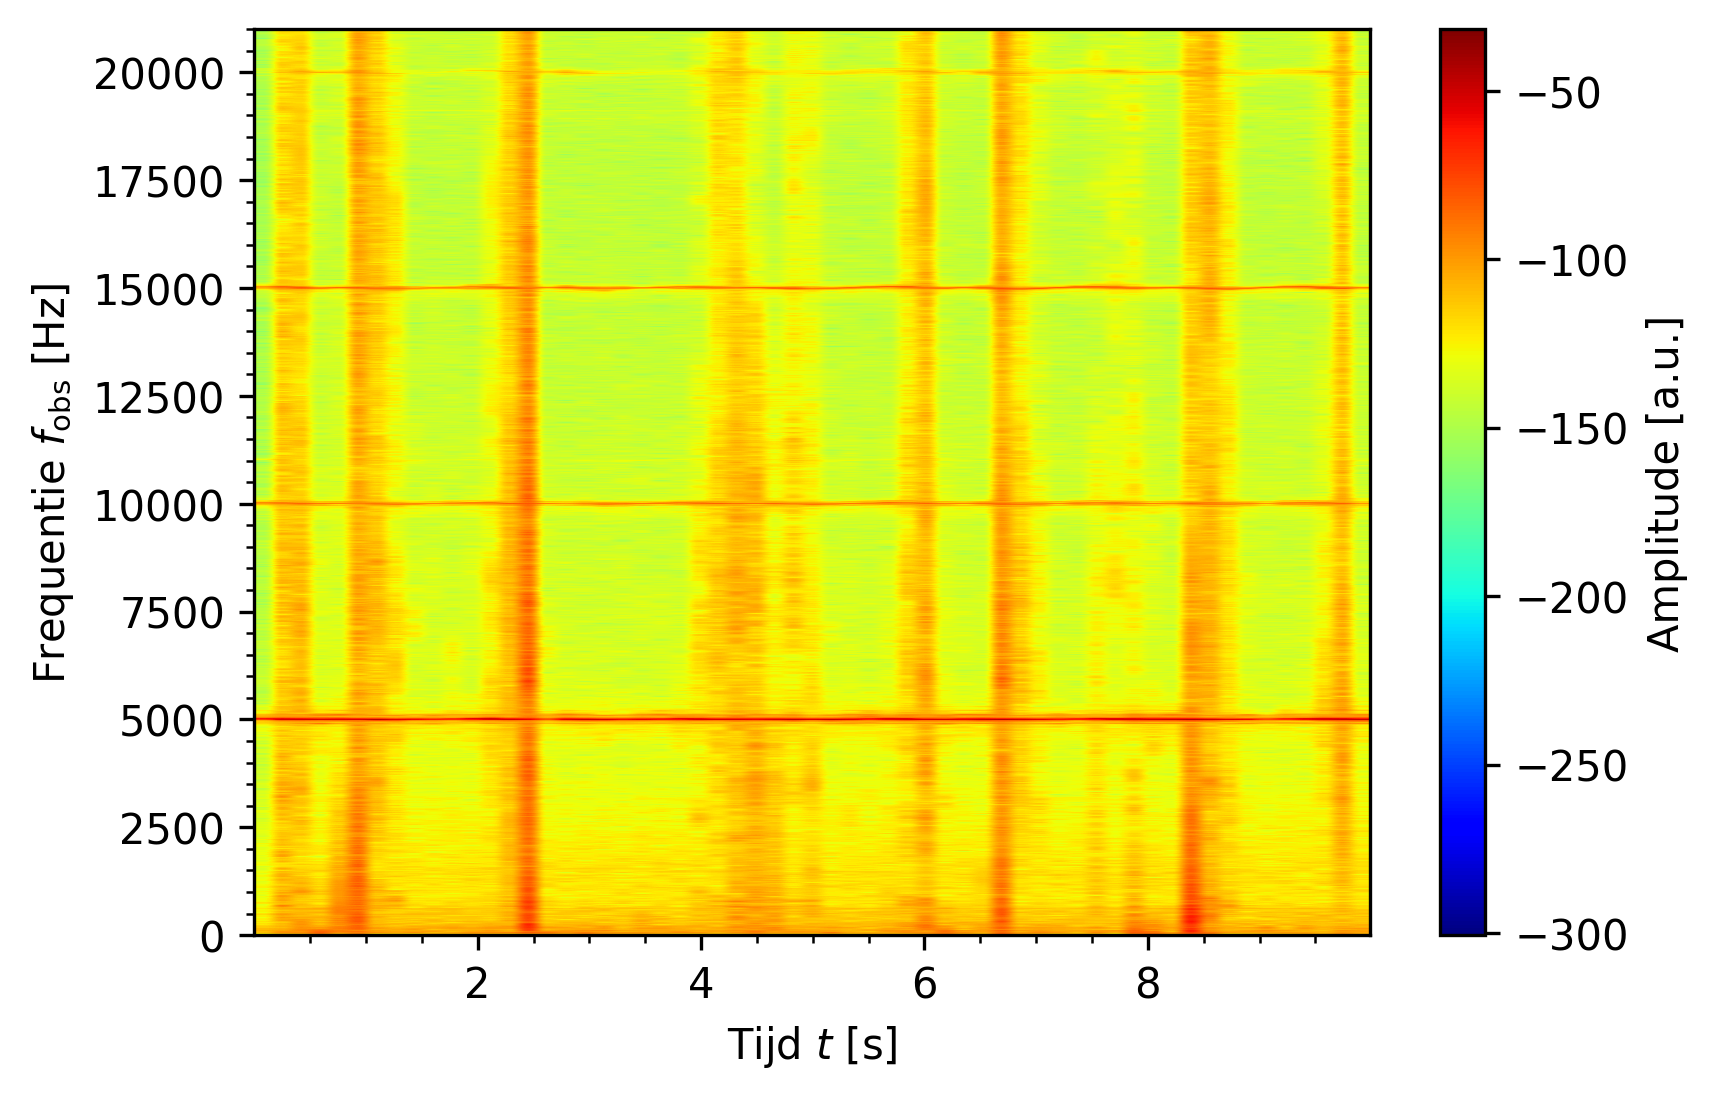

In [19]:
plt.figure(dpi=300)
_ = plt.specgram(arr[:,0], Fs=fs, NFFT=2**14, mode='psd', cmap='jet', vmin=None) #NFTT tussen 2**10 en 2**16
plt.colorbar(label="Amplitude [a.u.]")
plt.xlabel(r"Tijd $t$ [s]")
plt.ylabel(r"Frequentie $f_\mathrm{obs}$ [Hz]")
plt.minorticks_on()
plt.ylim([None, 21000])

Als vervolgstap stellen we de `colorbar` zodanig in dat de ruis niet mee weegt in het bepalen van de kleurenschaal. Het ruis niveau ligt hier op ongeveer -125.

(0.0, 21000.0)

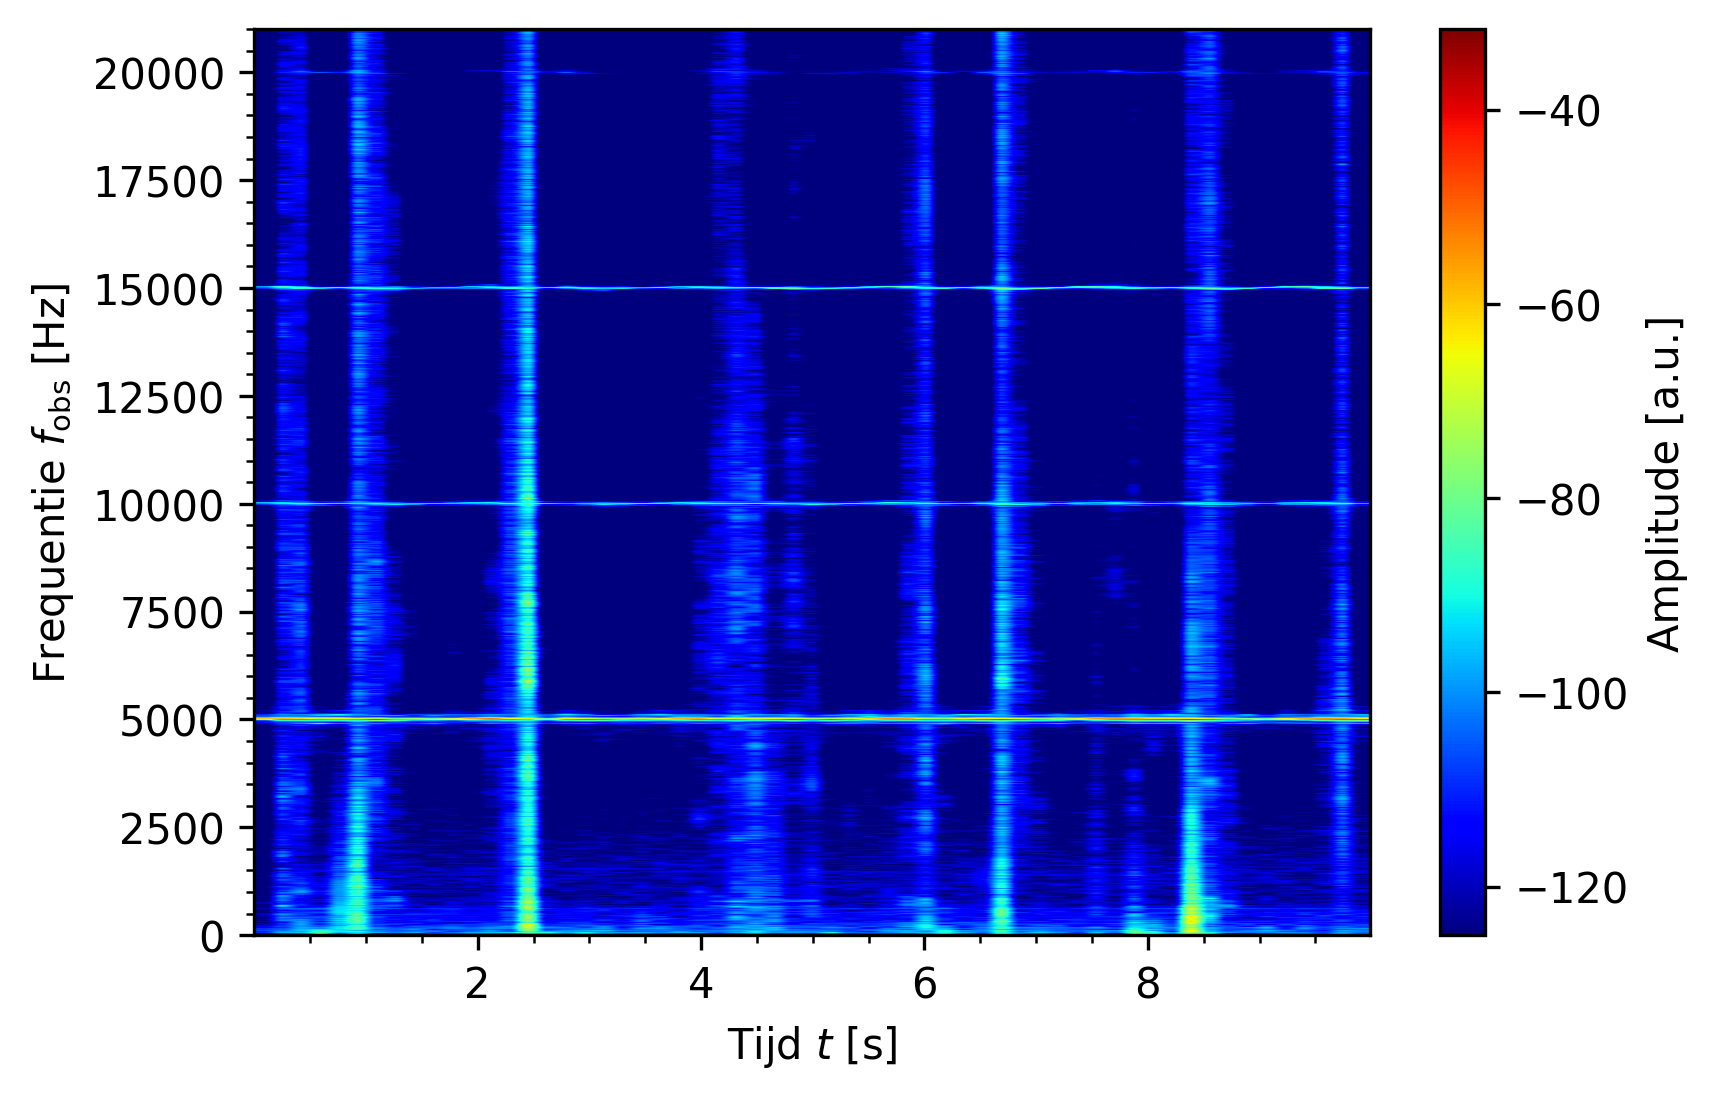

In [23]:
plt.figure(dpi=300)
_ = plt.specgram(arr[:,0], Fs=fs, NFFT=2**14, mode='psd', cmap='jet', vmin=-125) #NFTT tussen 2**10 en 2**16
plt.colorbar(label="Amplitude [a.u.]")
plt.xlabel(r"Tijd $t$ [s]")
plt.ylabel(r"Frequentie $f_\mathrm{obs}$ [Hz]")
plt.minorticks_on()
plt.ylim([None, 21000])

Laten we inzoomen rondom de uitgezonden frequentie. Let hier op de variabele `NFFT`. Wanneer je deze omhoog aanpast zal de onzekerheid in de frequentie kleiner worden, terwijl de onzekerheid in tijd groter zal worden. Zoek een balans zodanig dat de pixels in het spectrogram ongeveer vierkant worden. Instellingen verschillen per computer.

(4900.0, 5100.0)

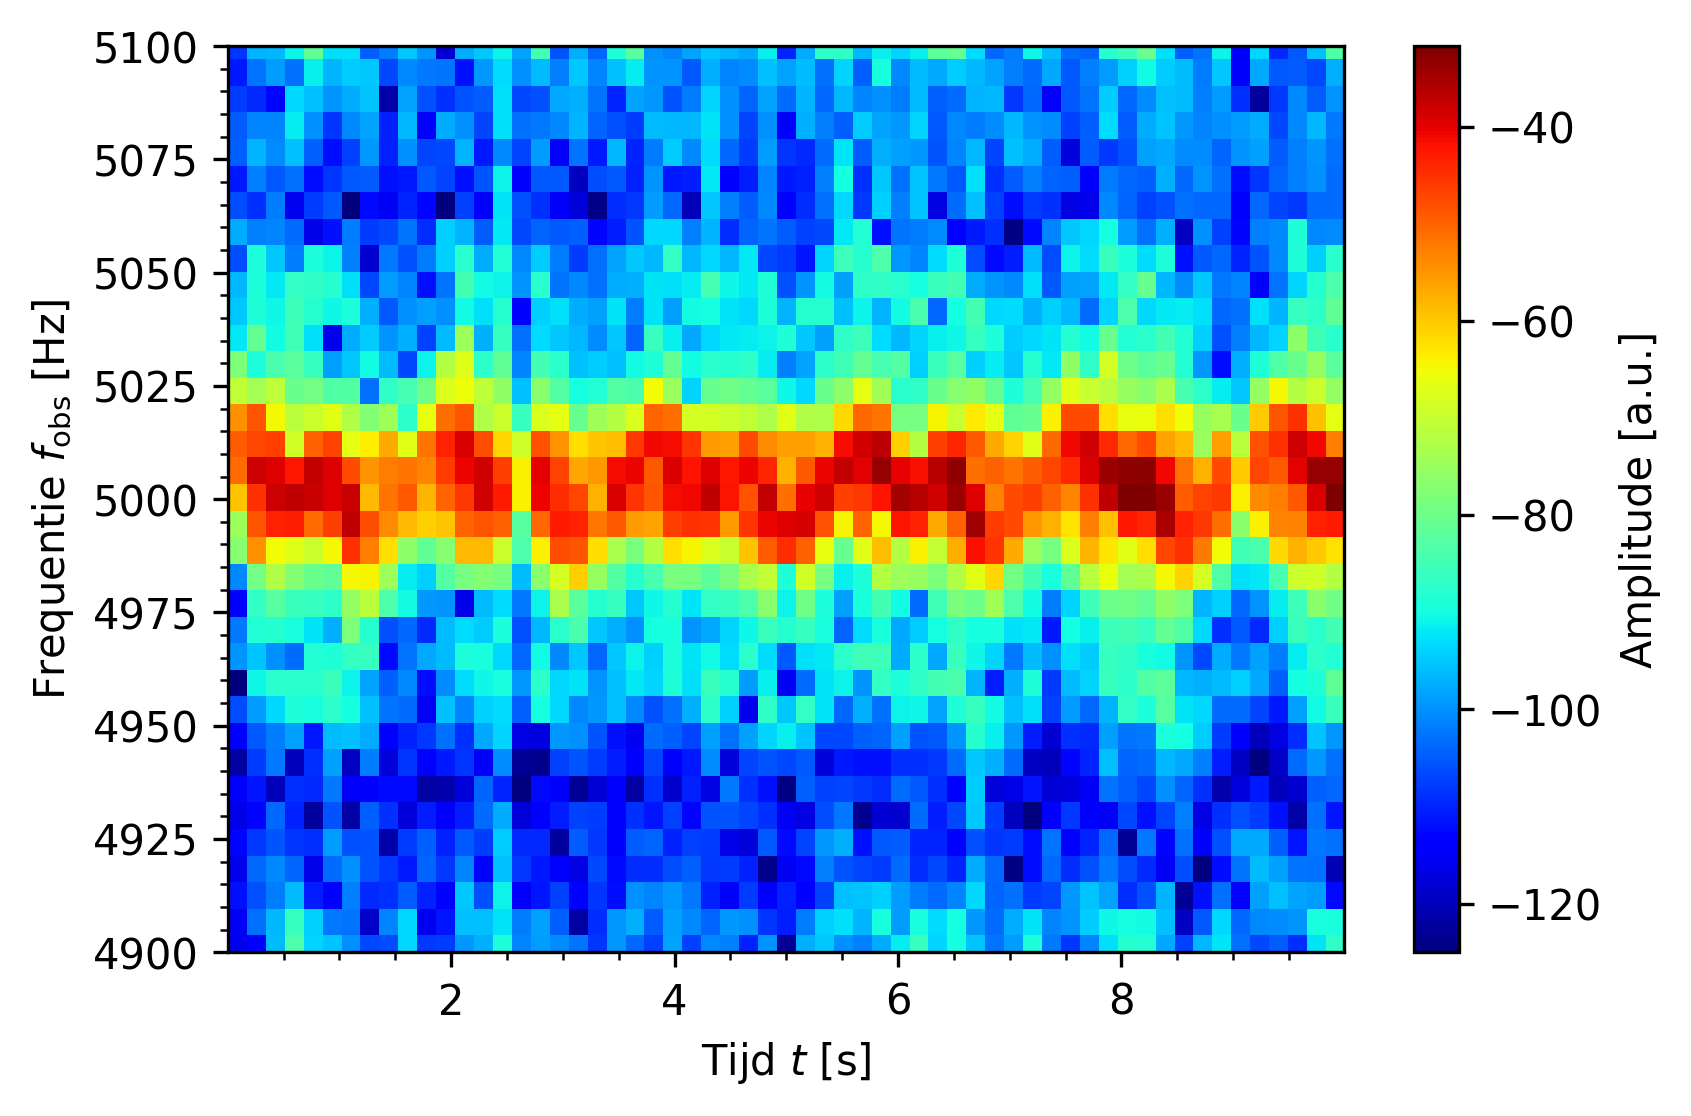

In [24]:
plt.figure(dpi=300)
_ = plt.specgram(arr[:,0], Fs=fs, NFFT=2**14, mode='psd', cmap='jet', vmin=-125) #NFTT tussen 2**10 en 2**16
plt.colorbar(label="Amplitude [a.u.]")
plt.xlabel(r"Tijd $t$ [s]")
plt.ylabel(r"Frequentie $f_\mathrm{obs}$ [Hz]")
plt.minorticks_on()
plt.ylim([5000-100, 5000+100])

We kunnen nog meer ruis wegfilteren!

(4900.0, 5100.0)

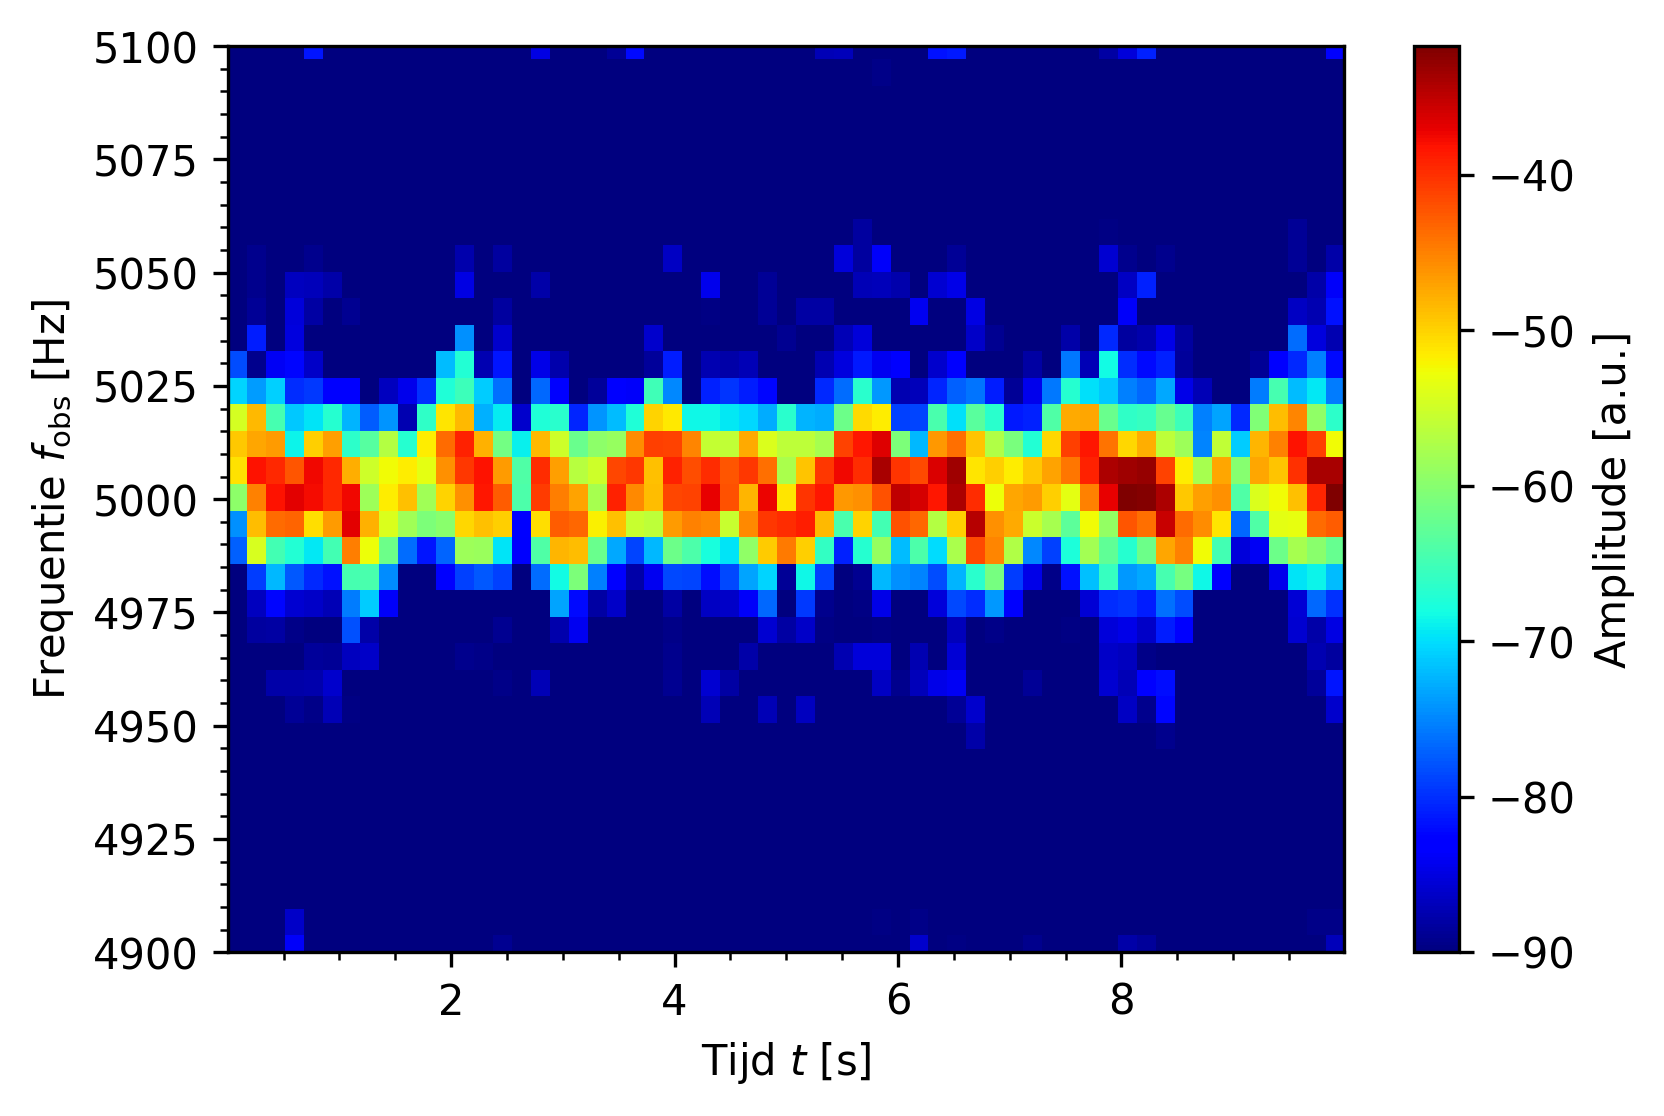

In [31]:
plt.figure(dpi=300)
_ = plt.specgram(arr[:,0], Fs=fs, NFFT=2**14, mode='psd', cmap='jet', vmin=-90) #NFTT tussen 2**10 en 2**16
plt.colorbar(label="Amplitude [a.u.]")
plt.xlabel(r"Tijd $t$ [s]")
plt.ylabel(r"Frequentie $f_\mathrm{obs}$ [Hz]")
plt.minorticks_on()
plt.ylim([5000-100, 5000+100])

Bovenstaand is een huis tuin en keuken Doppler effect aan een korte slinger. Uit de voorbereiding volgt $f_\mathrm{obs} \propto \sqrt{l}$, m.a.w. bij een langere slinger verwachten we een grotere frequentie verschuiving te zien.